## Load Functions and Libraries

In [1]:
%run "./lelib/leinit_py.py"

Root project dir is: C:\Users\bachtia2\Projects\ledecision\code


In [2]:
from lelib.lefunctions import *
from bs4 import BeautifulSoup
import urllib
import codecs
import pandas as pd
import sqlite3

## Connect to DB, load data and convert to dataframe

In [3]:
db_path = "./ledata/01_raw/ledb_1.db"

In [4]:
conn = sqlite3.connect(db_path)
c = conn.cursor()

In [5]:
c.execute('SELECT SQLITE_VERSION()')

In [6]:
c.execute('SELECT * FROM tweets')
raw_data = c.fetchall()

In [7]:
conn.close()

In [8]:
raw_df = pd.DataFrame(raw_data)
raw_df.columns = ['text', 'username', 'date', 'location']

In [9]:
# clear raw data list
del raw_data

In [10]:
raw_df[:5]

text       username  \
0  "Imagine the possibilities of a lineup includi...          SugeW   
1  @5ReasonsSports @MichaelRyanRuiz All the prais...    SuperJamono   
2  Ladies don’t date a guy who follows Lebron to ...  Mr_CEO_BTRAIN   
3  LeBron James Business Ventures, Howard Mitchel...   hmitchell535   
4  Forget the @Lakers and the @cavs, LeBron shoul...    sportsbyfry   

                  date                 location  
0  2018-06-30 12:49:33                 Delaware  
1  2018-06-30 12:49:33                           
2  2018-06-30 12:49:30  Uhrichsville  ➡️  Akron  
3  2018-06-30 12:49:28                           
4  2018-06-30 12:49:26                   Canada

## Clean Data

In [11]:
test_df = raw_df

In [12]:
import re

def tweet_cleaner(s):    
    s = re.sub(r"http\S+", "", s)
    s = s.replace("’", "")
    s = s.replace("'", "")
    s = s.replace("amp", "")
    s = re.sub(r"\s*[^A-Za-z]+\s*", " ", s)
    s = s.lower()
    return s

testing = raw_df.text[:]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
#test_result

In [13]:
# Combine into dataframe
test = pd.DataFrame(test_result)
test.columns = ['text']
clean_df = pd.concat([test, test_df['username'], test_df['date'], test_df['location']], axis=1)

In [105]:
test_df = clean_df
clean_df = test_df[test_df.text.str.contains('lebron')]

In [14]:
clean_df.text.to_csv('example.txt', sep='\t')

In [15]:
del testing, test_result

In [16]:
del raw_df, test_df, test

## Word cloud

In [ ]:
#!/usr/bin/env python
"""
Minimal Example
===============
Generating a square wordcloud from the US constitution using default arguments.
"""

from os import path
from wordcloud import WordCloud

#d = path.dirname(__file__)

# Read the whole text.
text = open(path.join('./example.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
#image.show()

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentdata = pd.DataFrame(columns=['neg', 'neu', 'pos', 'compound'])
        
test = clean_df.text[:]

for sentence in test:
    ss = sid.polarity_scores(sentence)
    sentdata = sentdata.append(pd.DataFrame(ss, index=[0]))
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()

In [18]:
del test

## Graphing

In [35]:
test = sentdata.query('compound != 0.0000')

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# plotdata = pd.concat([clean_df['date'], sentdata['compound']], axis=1)
#plotdata = plotdata[plotdata.compound != 0]

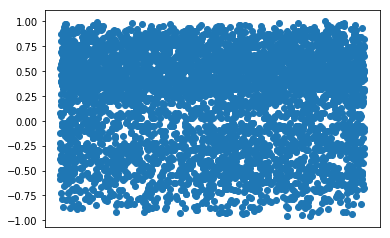

In [74]:
import numpy as np
import matplotlib.pyplot as plt

tlength = 5000

ind = np.arange(tlength)

plt.scatter(ind,test['compound'][:tlength])

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.show()

### Data with time

In [76]:
test_df = clean_df

In [77]:
test_df['date'] = pd.to_datetime(test_df['date'])  

In [78]:
test_df[:10]

text         username  \
0   imagine the possibilities of a lineup includi...            SugeW   
1   reasonssports michaelryanruiz all the praise ...      SuperJamono   
2  ladies dont date a guy who follows lebron to e...    Mr_CEO_BTRAIN   
3  lebron james business ventures howard mitchell...     hmitchell535   
4  forget the lakers and the cavs lebron should s...      sportsbyfry   
5   drew carmichaeldave i disagree about it being...  OldTakesExposed   
6   darrendreger it would be lebron signing with ...       DarylJay62   
7           the streets is watching hip hop proverb    GrandStCentral   
8   jemelehill i know all of you think that once ...        Jreid1997   
9   billsimmons the knicks go for at least billio...      brianfreeog   

                 date                 location  
0 2018-06-30 12:49:33                 Delaware  
1 2018-06-30 12:49:33                           
2 2018-06-30 12:49:30  Uhrichsville  ➡️  Akron  
3 2018-06-30 12:49:28                           
4 2018-06-30 12:49:26                   Canada  
5 2018-06-30 12:49:26      West Palm Beach, FL  
6 2018-06-30 12:49:23   Toronto Ontario Canada  
7 2018-06-30 12:49:11         Toronto, Ontario  
8 2018-06-30 12:49:10            United States  
9 2018-06-30 12:49:06

In [84]:
mask = (test_df['date'] <= '2018-06-30 09:00:00') & (test_df['date'] > '2018-06-30 08:00:00')
print(test_df.loc[mask])

                                                   text         username  \
1899  i love that lebron is changing the dynamic of ...   carbocommander   
1900  lebron james weighing many options as free age...         nbariver   
1901   goat szn chinkyeyedmike demidrange youre a le...    Dangitbfousey   
1902   optic scumper you do realize that lebron has ...     trodriguez82   
1903   thejonasknox maybe the pregnancy test compani...     IAmSuchADope   
1904  nba notebook lebron reportedly opting out beco...         nbariver   
1905  also ive been saying this for over a year now ...  andrew_gormley4   
1906   heartsunity hunterrob b ingramdagoat nbaontnt...        VipersLoL   
1907  real basketball fans know that nothing was bet...      rollie_rexx   
1908                         lebron is coming to philly   carbocommander   
1909   nba free agency what lebron james opting out ...         akmm1292   
1910  what the cavaliers should do if lebron james l...         akmm1292   
1911  lebron

In [89]:
len(test_df.loc[mask])

339